# Search for Molecular Dynamics publications in PubMed

Results can be verified [PubMed](https://pubmed.ncbi.nlm.nih.gov/?term=%22molecular+dynamics%22&filter=years.2000-2022&sort=date)

In [1]:
from Bio import Entrez
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%load_ext watermark
%watermark --python --machine
# Python packages versions
%watermark --packages jupyterlab --iversions --watermark
# conda environment name
%watermark --conda

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.6.0

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.15.0-67-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

jupyterlab: 3.6.1

Bio       : 1.81
pandas    : 1.5.3
matplotlib: 3.5.3

Watermark: 2.3.1

conda environment: mdda



Initiate Entrez module with your own e-mail address.

In [3]:
# Dummy e-mail address. Use your own.
Entrez.email = "bob@email.com"

Define function to query Pubmed per year

In [4]:
def query_pubmed(term="", year_start=2000, year_end=2022):
    years = []
    paper_count = []
    for year in range(year_start, year_end+1):
        query = (f'("{term}") AND '
                 f'("{year}/01/01"[Date - Publication] : "{year}/12/31"[Date - Publication])'
                )
        esearch_res = Entrez.read(Entrez.esearch(db="pubmed", term=query))
        years.append(year)
        paper_count.append(int(esearch_res["Count"]))
    return years, paper_count

## Molecular dynamics

In [5]:
print("Querying MD...")
years, md = query_pubmed(term="'molecular dynamics'[Title/Abstract]", year_start=2000, year_end=2022)
df_md = pd.DataFrame({"years": years, "MD": md})
df_md.to_csv("number_of_MD_papers_per_year.tsv", sep="\t", index=False)

Querying MD...


In [6]:
df_md.head()

,years,MD
0,2000,570
1,2001,666
2,2002,827
3,2003,881
4,2004,1412


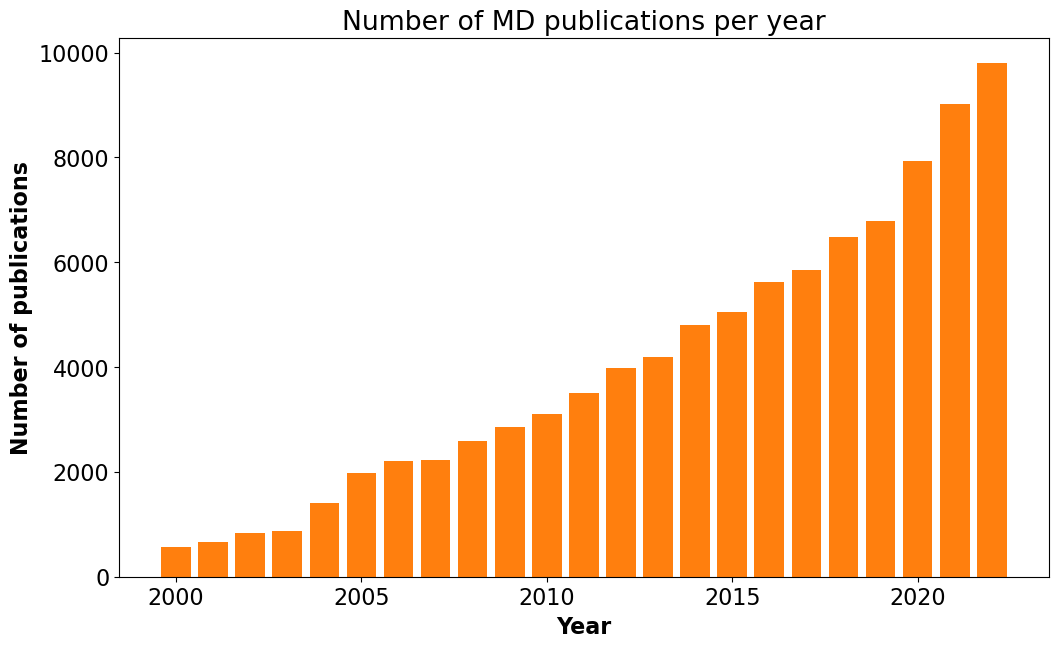

In [7]:
plt.rcParams.update({"font.size": 16})
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(df_md["years"], df_md["MD"], color="C1")
ax.set_title("Number of MD publications per year")
ax.set_xlabel("Year", weight="bold")
ax.set_ylabel("Number of publications", weight="bold")
fig.savefig("fig/number_of_MD_papers_per_year.svg")